<a href="https://colab.research.google.com/github/ianzin30/Data-Science-Project/blob/main/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Saúde e Estilo de Vida

Este notebook contém análises exploratórias de dados do dataset `Sleep_health_and_lifestyle_dataset.csv`, que inclui informações sobre saúde e estilo de vida, como duração do sono, qualidade do sono, nível de atividade física, e outros.

## Importação de Bibliotecas

Aqui, importamos as bibliotecas necessárias para nossa análise de dados.

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



```python
# Apenas baixando no colab a biblioteca

In [2]:
!pip install fancyimpute


In [2]:
import pandas as pd
import fancyimpute
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura dos Dados
Carregamos nosso dataset e exibimos as primeiras 10 linhas para ter uma visão inicial dos dados disponíveis.

In [3]:
# Lendo o arquivo csv e mostrando as 10 primeiras linhas do dataset

dataframe = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
dataframe.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42.0,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60.0,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,NaN,6,60.0,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30.0,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40.0,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75.0,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75.0,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75.0,6,Normal,120/80,70,8000,NaN


In [5]:
# Contando o número de entradas no dataset
print("Número total de entradas no dataset:", len(dataframe))

Número total de entradas no dataset: 382


In [6]:
# Descrição estatística das variáveis numéricas
dataframe.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,382.000000,382.000000,375.000000,382.000000,377.000000,382.000000,382.000000,382.000000
mean,189.109948,42.314136,7.136800,7.319372,59.230769,5.379581,70.157068,6825.916230
std,108.171287,8.680733,0.798113,1.200434,20.934734,1.782063,4.128060,1624.414637
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,96.250000,36.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,189.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,283.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
dataframe.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level    float64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

Observamos que algumas features estão como "object", podemos mudá-las para "category", para que sejam armazenadas de mais eficiente, além de facilitar também operações sobre elas. Não iremos colocar Blood Pressure como category, pois achamos que não se enquadra muito bem como uma categoria.

In [4]:
# trocando dados "object" para "category"
dataframe["Gender"] = dataframe["Gender"].astype("category")
dataframe["Occupation"] = dataframe["Occupation"].astype("category")
dataframe["BMI Category"] = dataframe["BMI Category"].astype("category")
dataframe["Sleep Disorder"] = dataframe["Sleep Disorder"].astype("category")

print(dataframe.dtypes)

Person ID                     int64
Gender                     category
Age                           int64
Occupation                 category
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level     float64
Stress Level                  int64
BMI Category               category
Blood Pressure               object
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder             category
dtype: object


## Conclusões sobre a definição de tipos

Ao revisar os tipos de dados no DataFrame, observamos que os tipos estão bem ajustados para a maioria dos campos, mas há oportunidades para otimizações. Identificadores e métricas quantitativas como "Person ID", "Age", e "Quality of Sleep" estão corretamente como int64. "Sleep Duration" está como float64, adequado para valores que necessitam precisão decimal. No entanto, colunas como "Gender", "Occupation", e "Blood Pressure", classificadas como `object`, poderiam ser convertidas para o tipo `categórico`. A conversão para categórico não só economiza memória, especialmente útil para grandes datasets, como também facilita a realização de análises estatísticas que dependem de agrupamento ou comparação de categorias.

## Tratamento de Valores Ausentes

```python
# Valores ausentes podem distorcer análises e afetar a performance de modelos preditivos. Aqui, investigamos e tratamos esses valores, assegurando a integridade de nosso conjunto de dados.
```

Utilizaremos Knn para prever os valores faltantes.

In [5]:
# precisamos converter as features categóricas para numéricas, a fim de usar knn (incluindo a feature de blood pressure, que não colocamos como categórica anteriormente)
predict_dataframe = dataframe.copy(deep=True)

predict_dataframe["Blood Pressure"] = predict_dataframe["Blood Pressure"].astype("category")


predict_dataframe["Gender"] = predict_dataframe["Gender"].cat.codes
predict_dataframe["Occupation"] = predict_dataframe["Occupation"].cat.codes
predict_dataframe["BMI Category"] = predict_dataframe["BMI Category"].cat.codes
predict_dataframe["Sleep Disorder"] = predict_dataframe["Sleep Disorder"].cat.codes
predict_dataframe["Blood Pressure"] = predict_dataframe["Blood Pressure"].cat.codes
predict_dataframe.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42.0,6,3,11,77,4200,-1
1,2,1,28,1,6.2,6,60.0,8,0,9,75,10000,-1
2,3,1,28,1,NaN,6,60.0,8,0,9,75,10000,-1
3,4,1,28,6,5.9,4,30.0,8,2,22,85,3000,1
4,5,1,28,6,5.9,4,30.0,8,2,22,85,3000,1


```python
# Mostrando o número de valores ausentes por coluna
print(dataframe.isnull().sum())

In [10]:
print(predict_dataframe.isnull().sum())

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             7
Quality of Sleep           0
Physical Activity Level    5
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


## Imputação de Valores Ausentes usando K-NN

```python
# Para tratar valores ausentes, utilizamos o método K-Nearest Neighbors (K-NN) que prevê os valores ausentes com base nos vizinhos mais próximos. Este método é particularmente útil para dados que podem ter padrões complexos que modelos mais simples não conseguiriam capturar adequadamente.

from fancyimpute import KNN

In [6]:
from fancyimpute import KNN

# Aplicando KNN
sleep_knn = KNN(k=3).fit_transform(predict_dataframe)

Imputing row 1/382 with 0 missing, elapsed time: 0.017
Imputing row 101/382 with 0 missing, elapsed time: 0.022
Imputing row 201/382 with 0 missing, elapsed time: 0.022
Imputing row 301/382 with 0 missing, elapsed time: 0.023


In [7]:
# Convertendo o resultado para um DataFrame
sleep_knn = pd.DataFrame(data=sleep_knn[0:, 0:], columns=["Person ID", "Gender", "Age", "Occupation", "Sleep Duration", 'Quality of Sleep', "Physical Activity Level", "Stress Level", "BMI Category", "Blood Pressure", "Heart Rate", "Daily Steps", "Sleep Disorder"])

In [13]:
# printando as primeiras 10 linhas do dataset
sleep_knn.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,1.0,27.0,9.0,6.100000,6.0,42.0,6.0,3.0,11.0,77.0,4200.0,-1.0
1,2.0,1.0,28.0,1.0,6.200000,6.0,60.0,8.0,0.0,9.0,75.0,10000.0,-1.0
2,3.0,1.0,28.0,1.0,6.199996,6.0,60.0,8.0,0.0,9.0,75.0,10000.0,-1.0
3,4.0,1.0,28.0,6.0,5.900000,4.0,30.0,8.0,2.0,22.0,85.0,3000.0,1.0
4,5.0,1.0,28.0,6.0,5.900000,4.0,30.0,8.0,2.0,22.0,85.0,3000.0,1.0
5,6.0,1.0,28.0,9.0,5.900000,4.0,30.0,8.0,2.0,22.0,85.0,3000.0,0.0
6,7.0,1.0,29.0,10.0,6.300000,6.0,40.0,7.0,2.0,22.0,82.0,3500.0,0.0
7,8.0,1.0,29.0,1.0,7.800000,7.0,75.0,6.0,0.0,6.0,70.0,8000.0,-1.0
8,9.0,1.0,29.0,1.0,7.800000,7.0,75.0,6.0,0.0,6.0,70.0,8000.0,-1.0
9,10.0,1.0,29.0,1.0,7.800000,7.0,75.0,6.0,0.0,6.0,70.0,8000.0,-1.0


In [14]:
# Verificando se ainda existem valores nulos
print(sleep_knn.isnull().sum())

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


#### Atualização de Tipos de Dados

```python
# Após a imputação, garantimos que os tipos de dados estejam corretos, especialmente para variáveis categóricas, onde utilizamos codificação numérica para facilitar análises futuras.

In [8]:
# Atualizando o DataFrame original com os dados imputados
dataframe["Sleep Duration"] = sleep_knn["Sleep Duration"]
dataframe["Physical Activity Level"] = sleep_knn["Physical Activity Level"]

dataframe.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42.0,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.200000,6,60.0,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.199996,6,60.0,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea


### Lidando com Entries/Rows Duplicadas

Identificamos e removemos entradas duplicadas para garantir a integridade dos dados. Isso é crucial para evitar distorções nas análises.

In [16]:
len(dataframe)

382

### Verificando as rows duplicadas

In [17]:
dataframe[dataframe.duplicated()].sort_values("Person ID").head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
134,134,Female,38,Accountant,7.1,8,60.0,4,Normal,115/75,68,7000,NaN
171,170,Male,41,Lawyer,7.7,8,90.0,5,Normal,130/85,70,8000,NaN
201,199,Male,43,Salesperson,6.5,6,45.0,7,Overweight,130/85,72,6000,Insomnia
290,287,Female,50,Nurse,6.0,6,90.0,8,Overweight,140/95,75,10000,Sleep Apnea
291,287,Female,50,Nurse,6.0,6,90.0,8,Overweight,140/95,75,10000,Sleep Apnea
337,332,Female,53,Engineer,8.4,9,30.0,3,Normal,125/80,65,5000,NaN
338,332,Female,53,Engineer,8.4,9,30.0,3,Normal,125/80,65,5000,NaN
381,374,Female,59,Nurse,8.1,9,75.0,3,Overweight,140/95,68,7000,Sleep Apnea


In [18]:
# quantidade de linhas duplicadas
len(dataframe[dataframe.duplicated()])

8

In [9]:
# removendo linhas duplicadas
dataframe.drop_duplicates(keep='first', inplace=True)

In [10]:
len(dataframe[dataframe.duplicated()])

0

In [21]:
len(dataframe)

374

## Normalização dos Dados

A normalização é crucial para garantir que variáveis com escalas diferentes não distorçam os resultados analíticos, especialmente em técnicas de análise que são sensíveis a variações de escala, como modelagem preditiva e algoritmos de machine learning.

```python
# Criação de um novo DataFrame para armazenar os dados normalizados
normalized_dataset = dataframe.copy(deep=True)

In [22]:
normalized_dataset = dataframe.copy(deep=True)
normalized_dataset.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42.0,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.200000,6,60.0,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.199996,6,60.0,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.900000,4,30.0,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.300000,6,40.0,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN


### Métodos de Normalização

Utilizamos a normalização Z-Score para as variáveis contínuas, que reescala os dados para terem média zero e desvio padrão de um. Isso é feito subtraindo a média e dividindo pelo desvio padrão de cada variável.

In [23]:
normalized_dataset["Age Norm"] = ((normalized_dataset["Age"] - normalized_dataset["Age"].mean()) / normalized_dataset["Age"].std())
normalized_dataset["Sleep Norm"] = ((normalized_dataset["Sleep Duration"] - normalized_dataset["Sleep Duration"].mean()) / normalized_dataset["Sleep Duration"].std())
normalized_dataset["Quality Norm"] = ((normalized_dataset["Quality of Sleep"] - normalized_dataset["Quality of Sleep"].mean()) / normalized_dataset["Quality of Sleep"].std())
normalized_dataset["Physical Norm"] = ((normalized_dataset["Physical Activity Level"] - normalized_dataset["Physical Activity Level"].mean()) / normalized_dataset["Physical Activity Level"].std())
normalized_dataset["Stress Norm"] = ((normalized_dataset["Stress Level"] - normalized_dataset["Stress Level"].mean()) / normalized_dataset["Stress Level"].std())
normalized_dataset["Heart Norm"] = ((normalized_dataset["Heart Rate"] - normalized_dataset["Heart Rate"].mean()) / normalized_dataset["Heart Rate"].std())
normalized_dataset["Steps Norm"] = ((normalized_dataset["Daily Steps"] - normalized_dataset["Daily Steps"].mean()) / normalized_dataset["Daily Steps"].std())
normalized_dataset.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Norm,Sleep Norm,Quality Norm,Physical Norm,Stress Norm,Heart Norm,Steps Norm
0,1,Male,27,Software Engineer,6.100000,6,42.0,6,Overweight,126/83,77,4200,NaN,-1.750750,-1.296330,-1.096811,-0.826915,0.346556,1.652505,-1.617417
1,2,Male,28,Doctor,6.200000,6,60.0,8,Normal,125/80,75,10000,NaN,-1.635452,-1.170670,-1.096811,0.038520,1.473618,1.168908,1.967442
2,3,Male,28,Doctor,6.199996,6,60.0,8,Normal,125/80,75,10000,NaN,-1.635452,-1.170675,-1.096811,0.038520,1.473618,1.168908,1.967442
3,4,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112
4,5,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112
5,6,Male,28,Software Engineer,5.900000,4,30.0,8,Obese,140/90,85,3000,Insomnia,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112
6,7,Male,29,Teacher,6.300000,6,40.0,7,Obese,140/90,82,3500,Insomnia,-1.520153,-1.045010,-1.096811,-0.923075,0.910087,2.861497,-2.050073
7,8,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN,-1.520153,0.839891,-0.261358,0.759717,0.346556,-0.040084,0.731284
8,9,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN,-1.520153,0.839891,-0.261358,0.759717,0.346556,-0.040084,0.731284
9,10,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN,-1.520153,0.839891,-0.261358,0.759717,0.346556,-0.040084,0.731284


In [24]:
normalized_dataset.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Age Norm,Sleep Norm,Quality Norm,Physical Norm,Stress Norm,Heart Norm,Steps Norm
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02
mean,187.500000,42.184492,7.131616,7.312834,59.198825,5.385027,70.165775,6816.844920,-2.279816e-16,-4.559633e-16,2.279816e-16,-9.499234e-17,2.279816e-16,-1.329893e-15,-7.599388e-17
std,108.108742,8.673133,0.795798,1.196956,20.798773,1.774526,4.135676,1617.915679,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,-1.750750e+00,-1.673310e+00,-2.767716e+00,-1.403873e+00,-1.344036e+00,-1.249077e+00,-2.359112e+00
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,-7.995371e-01,-9.193496e-01,-1.096811e+00,-6.826761e-01,-7.805050e-01,-5.236812e-01,-7.521065e-01
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,9.402692e-02,8.593075e-02,-2.613582e-01,3.852028e-02,-2.169744e-01,-4.008424e-02,1.132043e-01
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,9.011170e-01,8.398910e-01,5.740945e-01,7.597167e-01,9.100869e-01,4.435127e-01,7.312835e-01
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,1.938804e+00,1.719511e+00,1.409547e+00,1.480913e+00,1.473618e+00,3.828691e+00,1.967442e+00



### Explicação Adicional

- **Por que normalizar?** Algoritmos como K-Means clustering, PCA, regressão linear, e redes neurais são sensíveis à escala das variáveis de entrada. Variáveis com grandes variações podem influenciar desproporcionalmente o modelo, levando a resultados enviesados ou subótimos.
- **Impacto da Normalização**: Além de facilitar a modelagem, a normalização também ajuda na visualização dos dados, tornando mais fácil identificar padrões e outliers em escalas comparáveis.

---


# Discretização de Dados

Discretizar uma variável contínua transforma-a em várias categorias com intervalos definidos. Isso é útil em análises que requerem agrupamento de dados ou quando os algoritmos de machine learning se beneficiam de variáveis categóricas.

```python
# Cópia do dataset para manter o original intacto
discretized_dataset = normalized_dataset.copy(deep=True)



In [25]:
discretized_dataset = normalized_dataset.copy(deep=True)
discretized_dataset.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Norm,Sleep Norm,Quality Norm,Physical Norm,Stress Norm,Heart Norm,Steps Norm
0,1,Male,27,Software Engineer,6.100000,6,42.0,6,Overweight,126/83,77,4200,NaN,-1.750750,-1.296330,-1.096811,-0.826915,0.346556,1.652505,-1.617417
1,2,Male,28,Doctor,6.200000,6,60.0,8,Normal,125/80,75,10000,NaN,-1.635452,-1.170670,-1.096811,0.038520,1.473618,1.168908,1.967442
2,3,Male,28,Doctor,6.199996,6,60.0,8,Normal,125/80,75,10000,NaN,-1.635452,-1.170675,-1.096811,0.038520,1.473618,1.168908,1.967442
3,4,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112
4,5,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112
5,6,Male,28,Software Engineer,5.900000,4,30.0,8,Obese,140/90,85,3000,Insomnia,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112
6,7,Male,29,Teacher,6.300000,6,40.0,7,Obese,140/90,82,3500,Insomnia,-1.520153,-1.045010,-1.096811,-0.923075,0.910087,2.861497,-2.050073
7,8,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN,-1.520153,0.839891,-0.261358,0.759717,0.346556,-0.040084,0.731284
8,9,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN,-1.520153,0.839891,-0.261358,0.759717,0.346556,-0.040084,0.731284
9,10,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN,-1.520153,0.839891,-0.261358,0.759717,0.346556,-0.040084,0.731284


```python
# Discretização da variável 'Sleep Duration' em 10 intervalos

In [26]:
discretized_dataset["Sleep Discretized"] = pd.cut(discretized_dataset["Sleep Duration"], 10)
discretized_dataset.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Daily Steps,Sleep Disorder,Age Norm,Sleep Norm,Quality Norm,Physical Norm,Stress Norm,Heart Norm,Steps Norm,Sleep Discretized
0,1,Male,27,Software Engineer,6.100000,6,42.0,6,Overweight,126/83,...,4200,NaN,-1.750750,-1.296330,-1.096811,-0.826915,0.346556,1.652505,-1.617417,"(6.07, 6.34]"
1,2,Male,28,Doctor,6.200000,6,60.0,8,Normal,125/80,...,10000,NaN,-1.635452,-1.170670,-1.096811,0.038520,1.473618,1.168908,1.967442,"(6.07, 6.34]"
2,3,Male,28,Doctor,6.199996,6,60.0,8,Normal,125/80,...,10000,NaN,-1.635452,-1.170675,-1.096811,0.038520,1.473618,1.168908,1.967442,"(6.07, 6.34]"
3,4,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,...,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112,"(5.797, 6.07]"
4,5,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,...,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112,"(5.797, 6.07]"
5,6,Male,28,Software Engineer,5.900000,4,30.0,8,Obese,140/90,...,3000,Insomnia,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112,"(5.797, 6.07]"
6,7,Male,29,Teacher,6.300000,6,40.0,7,Obese,140/90,...,3500,Insomnia,-1.520153,-1.045010,-1.096811,-0.923075,0.910087,2.861497,-2.050073,"(6.07, 6.34]"
7,8,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,...,8000,NaN,-1.520153,0.839891,-0.261358,0.759717,0.346556,-0.040084,0.731284,"(7.69, 7.96]"
8,9,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,...,8000,NaN,-1.520153,0.839891,-0.261358,0.759717,0.346556,-0.040084,0.731284,"(7.69, 7.96]"
9,10,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,...,8000,NaN,-1.520153,0.839891,-0.261358,0.759717,0.346556,-0.040084,0.731284,"(7.69, 7.96]"


In [27]:
# mostrando os intervalos
discretized_dataset["Sleep Discretized"].value_counts()

Sleep Discretized
(7.69, 7.96]     59
(6.34, 6.61]     55
(7.15, 7.42]     55
(6.07, 6.34]     49
(7.96, 8.23]     39
(5.797, 6.07]    38
(8.23, 8.5]      32
(6.88, 7.15]     22
(7.42, 7.69]     15
(6.61, 6.88]     10
Name: count, dtype: int64


### Explicação Adicional

- **Por que discretizar?** A discretização ajuda na interpretação dos modelos e na análise, transformando dados contínuos em um formato que imita a maneira como os humanos categorizam naturalmente informações (como curto, médio e longo).
- **Impactos da discretização**: Além de facilitar a interpretação, a discretização pode melhorar a performance de certos algoritmos de classificação, ao reduzir a sensibilidade a pequenas flutuações nos dados contínuos, focando em tendências maiores que são mais robustas a ruídos.

---

## Detecção de Outliers

A presença de outliers pode influenciar negativamente nossas análises e modelos preditivos. Utilizamos box plots para identificar visualmente outliers nas principais variáveis do dataset.

### Visualização de Outliers com Box Plots

```python
# Box plots são extremamente úteis para detectar outliers, pois mostram a distribuição dos dados através de quartis e destacam pontos que caem fora do intervalo interquartil estendido.


<Axes: >

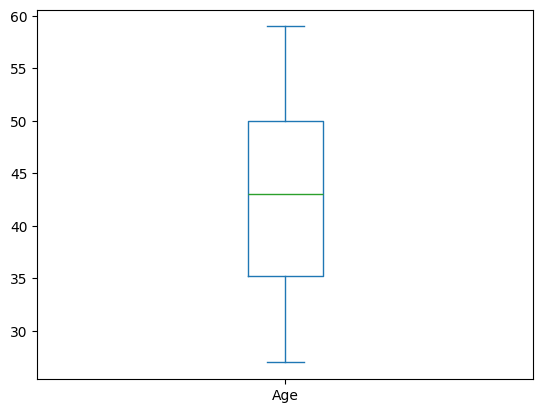

In [28]:
discretized_dataset["Age"].plot.box()

<Axes: >

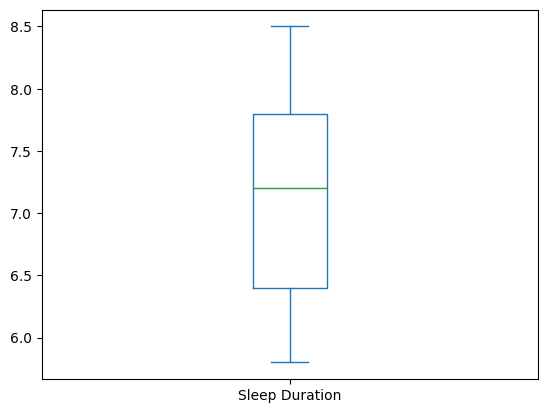

In [29]:
discretized_dataset["Sleep Duration"].plot.box()

<Axes: >

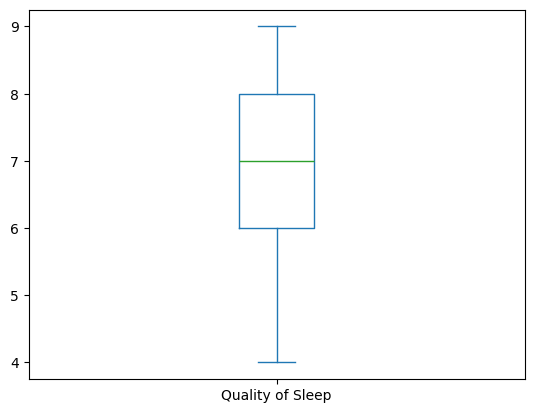

In [30]:
discretized_dataset["Quality of Sleep"].plot.box()

<Axes: >

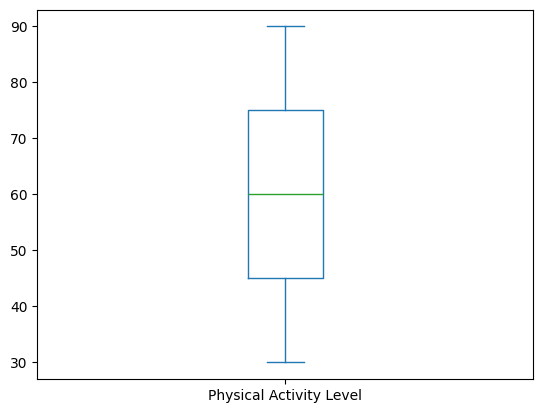

In [31]:
discretized_dataset["Physical Activity Level"].plot.box()

<Axes: >

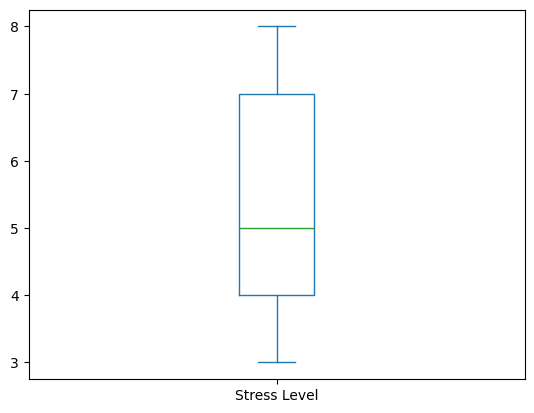

In [32]:
discretized_dataset["Stress Level"].plot.box()

<Axes: >

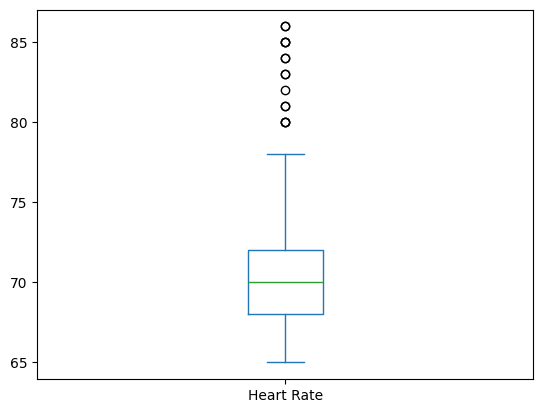

In [33]:
discretized_dataset["Heart Rate"].plot.box()

Aqui verificamos a existência de algumas instâncias fora do intervalo interquartil, porém, a partir de conhecimento de domínio, podemos afirmar que não são outliers. Conversamos com um amigo médico e batimentos cardíacos na faixa de 50 a 100, para adultos em repouso, não é anormal.

<Axes: >

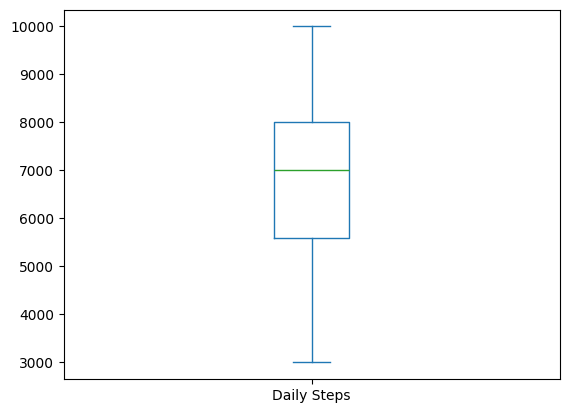

In [34]:
discretized_dataset["Daily Steps"].plot.box()

## Remoção e Codificação de Outliers

Não temos outliers, mas normalmente, após a detecção de outliers, procederíamos com a remoção ou tratamento destes para evitar distorções nas análises subsequentes. Em algumas situações, em vez de remover, optamos por codificar os outliers para preservar informações que podem ser úteis.

### Codificação e Tratamento de Outliers

Optaríamos por codificar variáveis categóricas que contêm outliers, transformando-as de strings para códigos numéricos. Isso simplifica os processos de análise que seguem e ajuda na integração com algoritmos de machine learning que requerem entrada numérica.

```python
# Criando uma cópia do dataset para tratamento de outliers
outlier_dataframe = discretized_dataset.copy(deep=True)

In [35]:
discretized_dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Daily Steps,Sleep Disorder,Age Norm,Sleep Norm,Quality Norm,Physical Norm,Stress Norm,Heart Norm,Steps Norm,Sleep Discretized
0,1,Male,27,Software Engineer,6.100000,6,42.0,6,Overweight,126/83,...,4200,NaN,-1.750750,-1.296330,-1.096811,-0.826915,0.346556,1.652505,-1.617417,"(6.07, 6.34]"
1,2,Male,28,Doctor,6.200000,6,60.0,8,Normal,125/80,...,10000,NaN,-1.635452,-1.170670,-1.096811,0.038520,1.473618,1.168908,1.967442,"(6.07, 6.34]"
2,3,Male,28,Doctor,6.199996,6,60.0,8,Normal,125/80,...,10000,NaN,-1.635452,-1.170675,-1.096811,0.038520,1.473618,1.168908,1.967442,"(6.07, 6.34]"
3,4,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,...,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112,"(5.797, 6.07]"
4,5,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,...,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112,"(5.797, 6.07]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,370,Female,59,Nurse,8.100000,9,75.0,3,Overweight,140/95,...,7000,Sleep Apnea,1.938804,1.216871,1.409547,0.759717,-1.344036,-0.523681,0.113204,"(7.96, 8.23]"
377,371,Female,59,Nurse,8.000000,9,75.0,3,Overweight,140/95,...,7000,Sleep Apnea,1.938804,1.091211,1.409547,0.759717,-1.344036,-0.523681,0.113204,"(7.96, 8.23]"
378,372,Female,59,Nurse,8.100000,9,75.0,3,Overweight,140/95,...,7000,Sleep Apnea,1.938804,1.216871,1.409547,0.759717,-1.344036,-0.523681,0.113204,"(7.96, 8.23]"
379,373,Female,59,Nurse,8.100000,9,75.0,3,Overweight,140/95,...,7000,Sleep Apnea,1.938804,1.216871,1.409547,0.759717,-1.344036,-0.523681,0.113204,"(7.96, 8.23]"


In [36]:
outlier_dataframe = discretized_dataset.copy(deep=True)

In [37]:
outlier_dataframe

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Daily Steps,Sleep Disorder,Age Norm,Sleep Norm,Quality Norm,Physical Norm,Stress Norm,Heart Norm,Steps Norm,Sleep Discretized
0,1,Male,27,Software Engineer,6.100000,6,42.0,6,Overweight,126/83,...,4200,NaN,-1.750750,-1.296330,-1.096811,-0.826915,0.346556,1.652505,-1.617417,"(6.07, 6.34]"
1,2,Male,28,Doctor,6.200000,6,60.0,8,Normal,125/80,...,10000,NaN,-1.635452,-1.170670,-1.096811,0.038520,1.473618,1.168908,1.967442,"(6.07, 6.34]"
2,3,Male,28,Doctor,6.199996,6,60.0,8,Normal,125/80,...,10000,NaN,-1.635452,-1.170675,-1.096811,0.038520,1.473618,1.168908,1.967442,"(6.07, 6.34]"
3,4,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,...,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112,"(5.797, 6.07]"
4,5,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,...,3000,Sleep Apnea,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112,"(5.797, 6.07]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,370,Female,59,Nurse,8.100000,9,75.0,3,Overweight,140/95,...,7000,Sleep Apnea,1.938804,1.216871,1.409547,0.759717,-1.344036,-0.523681,0.113204,"(7.96, 8.23]"
377,371,Female,59,Nurse,8.000000,9,75.0,3,Overweight,140/95,...,7000,Sleep Apnea,1.938804,1.091211,1.409547,0.759717,-1.344036,-0.523681,0.113204,"(7.96, 8.23]"
378,372,Female,59,Nurse,8.100000,9,75.0,3,Overweight,140/95,...,7000,Sleep Apnea,1.938804,1.216871,1.409547,0.759717,-1.344036,-0.523681,0.113204,"(7.96, 8.23]"
379,373,Female,59,Nurse,8.100000,9,75.0,3,Overweight,140/95,...,7000,Sleep Apnea,1.938804,1.216871,1.409547,0.759717,-1.344036,-0.523681,0.113204,"(7.96, 8.23]"


```python
# Convertendo variáveis categóricas para códigos numéricos

In [38]:
outlier_dataframe["Blood Pressure"] = outlier_dataframe["Blood Pressure"].astype("category")


outlier_dataframe["Gender"] = outlier_dataframe["Gender"].cat.codes
outlier_dataframe["Occupation"] = outlier_dataframe["Occupation"].cat.codes
outlier_dataframe["BMI Category"] = outlier_dataframe["BMI Category"].cat.codes
outlier_dataframe["Sleep Disorder"] = outlier_dataframe["Sleep Disorder"].cat.codes
outlier_dataframe["Blood Pressure"] = outlier_dataframe["Blood Pressure"].cat.codes
outlier_dataframe.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Daily Steps,Sleep Disorder,Age Norm,Sleep Norm,Quality Norm,Physical Norm,Stress Norm,Heart Norm,Steps Norm,Sleep Discretized
0,1,1,27,9,6.100000,6,42.0,6,3,11,...,4200,-1,-1.750750,-1.296330,-1.096811,-0.826915,0.346556,1.652505,-1.617417,"(6.07, 6.34]"
1,2,1,28,1,6.200000,6,60.0,8,0,9,...,10000,-1,-1.635452,-1.170670,-1.096811,0.038520,1.473618,1.168908,1.967442,"(6.07, 6.34]"
2,3,1,28,1,6.199996,6,60.0,8,0,9,...,10000,-1,-1.635452,-1.170675,-1.096811,0.038520,1.473618,1.168908,1.967442,"(6.07, 6.34]"
3,4,1,28,6,5.900000,4,30.0,8,2,22,...,3000,1,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112,"(5.797, 6.07]"
4,5,1,28,6,5.900000,4,30.0,8,2,22,...,3000,1,-1.635452,-1.547650,-2.767716,-1.403873,1.473618,3.586893,-2.359112,"(5.797, 6.07]"


In [39]:
corr_matrix = outlier_dataframe[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'BMI Category', 'Blood Pressure', 'Stress Level', 'Daily Steps']].corr()


# Exibindo a matriz de correlação
print(corr_matrix)


                         Sleep Duration  Quality of Sleep  \
Sleep Duration                 1.000000          0.883196   
Quality of Sleep               0.883196          1.000000   
Physical Activity Level        0.210453          0.191729   
Heart Rate                    -0.516550         -0.659865   
BMI Category                  -0.376592         -0.312562   
Blood Pressure                -0.192127         -0.147769   
Stress Level                  -0.811208         -0.898752   
Daily Steps                   -0.040034          0.016791   

                         Physical Activity Level  Heart Rate  BMI Category  \
Sleep Duration                          0.210453   -0.516550     -0.376592   
Quality of Sleep                        0.191729   -0.659865     -0.312562   
Physical Activity Level                 1.000000    0.137129      0.076064   
Heart Rate                              0.137129    1.000000      0.295585   
BMI Category                            0.076064    0.295585

## Análise de Correlação do Dataset, útil para decidir técnica de remoção de outliers

#### Resultados da Análise de Correlação
```python
# A matriz de correlação gerada fornece informações sobre a força e a direção das relações lineares entre pares de variáveis. Aqui estão as principais conclusões:
```

1. **Relação Sono e Estresse**:
   - **Duração do Sono e Nível de Estresse**: Correlação negativa forte (-0.811208), indicando que uma maior duração do sono está associada a níveis mais baixos de estresse.
   - **Qualidade do Sono e Nível de Estresse**: Correlação negativa forte (-0.898752), sugerindo que uma melhor qualidade do sono está associada a menores níveis de estresse.

2. **Atividade Física e Saúde**:
   - **Nível de Atividade Física e Passos Diários**: Correlação positiva forte (0.774890), mostrando que um maior nível de atividade física está associado a um maior número de passos diários.
   - **Nível de Atividade Física e Nível de Estresse**: Correlação negativa moderada (-0.670026), indicando que um maior nível de atividade física está associado a níveis mais baixos de estresse.

3. **Qualidade do Sono e Frequência Cardíaca**:
   - Correlação negativa moderada (-0.659865), sugerindo que uma melhor qualidade do sono está associada a uma menor frequência cardíaca.

4. **Índice de Massa Corporal (BMI) e Frequência Cardíaca**:
   - Correlação positiva moderada (0.295558), sugerindo que um maior índice de massa corporal está associado a uma frequência cardíaca mais alta.

#### Conclusões

- **Sono e Estresse**: A duração e a qualidade do sono têm uma forte correlação com os níveis de estresse. Indivíduos que dormem mais e têm uma melhor qualidade de sono tendem a ter níveis de estresse mais baixos.
- **Atividade Física**: O nível de atividade física, medido pelos passos diários, está fortemente correlacionado com a frequência cardíaca e o nível de estresse, sugerindo que a atividade física pode ajudar a reduzir o estresse e controlar a frequência cardíaca.
- **Saúde Geral**: Uma melhor qualidade do sono está associada a uma menor frequência cardíaca, indicando um melhor estado de saúde geral. Além disso, um maior índice de massa corporal está associado a uma frequência cardíaca mais alta, destacando a importância de manter um peso saudável.

#### Próximos Passos

- **Análise Multivariada**: Com base nas correlações encontradas, métodos multivariados como Elliptic Envelope ou Isolation Forests podem ser usados para detectar outliers, considerando as interações entre variáveis.

---


# Porém, não será necessário tratar tais valores
```python
# Podemos utilizar nosso conhecimento de domínio para afirmar que tais outliers de frequência cardíaca são normais para um humano em repouso, visto que estão em um intervalo aceito de BPMs, além disso, não variam de forma preocupante como pode ser observado nos plots acima, dessa forma, aceitamos que não seria necessário utlizar métodos para outliers que estão de certa forma "corretos".


# Análise descritiva

```python
# Novamente vamos printar as primeiras 10 linhas do dataset para relembrarmos sua estrutura.
```
Utilizamos o dataframe com valores antes da normalização, a fim de termos uma melhor interpretabilidade, utilizando o nosso conhecimento do domínio.

In [41]:
dataframe.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42.0,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.200000,6,60.0,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.199996,6,60.0,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30.0,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.900000,4,30.0,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.300000,6,40.0,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.800000,7,75.0,6,Normal,120/80,70,8000,NaN


### Gráfico de sono ``Duração x Qualidade``
```python
# Temos aqui um plot direto para visualizarmos a correlação calculada entre a duração e a qualidade do sono

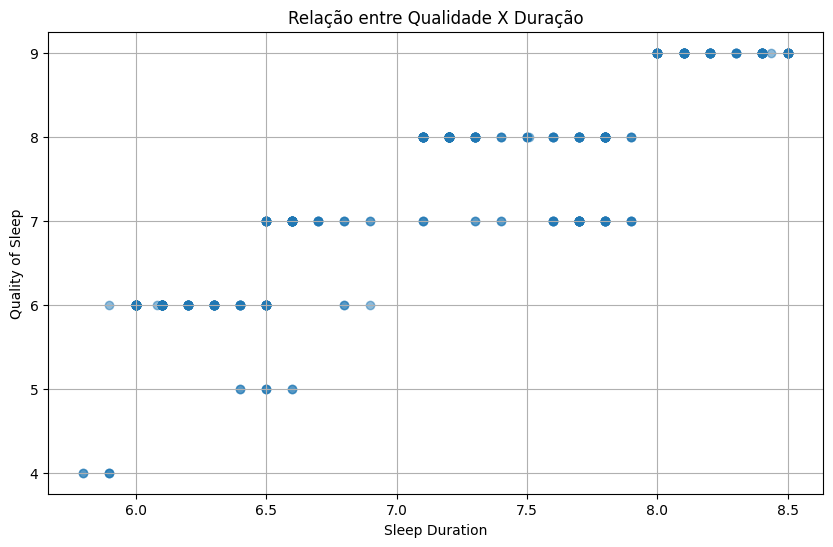

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(dataframe['Sleep Duration'], dataframe['Quality of Sleep'], alpha=0.5)
plt.title('Relação entre Qualidade X Duração')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.grid(True)
plt.show()

In [12]:
import numpy as np

### `Regression line` no gráfico citado

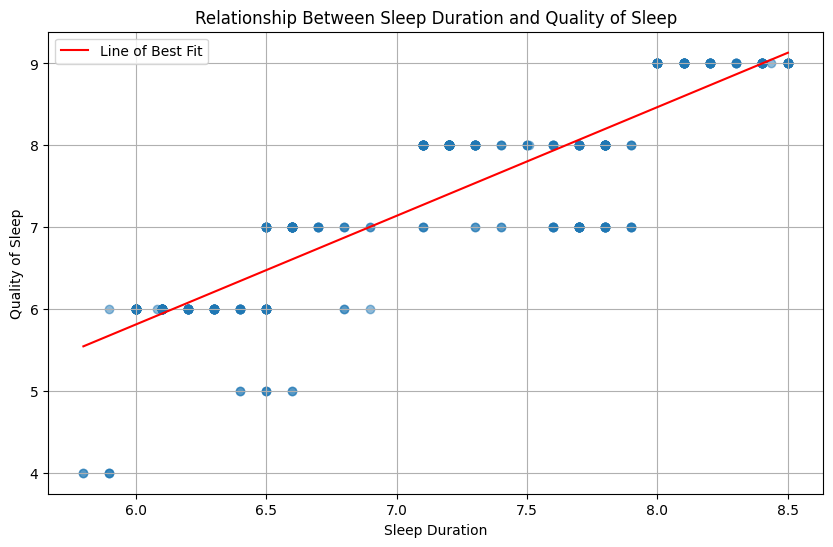

In [60]:

plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(dataframe['Sleep Duration'], dataframe['Quality of Sleep'], alpha=0.5)  # Plota os pontos de dispersão com transparência

# Calcula os coeficientes para a linha 
slope, intercept = np.polyfit(dataframe['Sleep Duration'], dataframe['Quality of Sleep'], 1)  # Calcula a inclinação e o intercept da linha

# Cria valores de x para a linha a partir dos dados de dispersão
x = np.array([dataframe['Sleep Duration'].min(), dataframe['Sleep Duration'].max()])  # Define o intervalo de x baseado no mínimo e máximo

# Calcula os valores correspondentes de y a partir da inclinação e intercepto
y = slope * x + intercept  # Calcula y usando a equação da linha

# Plota a linha de melhor ajuste
plt.plot(x, y, 'r', label='Line of Best Fit')  # Plota a linha de melhor ajuste em vermelho e adiciona uma legenda

# Adiciona rótulos, título, grade e legenda ao gráfico
plt.xlabel('Sleep Duration')  # Rótulo do eixo x
plt.ylabel('Quality of Sleep')  # Rótulo do eixo y
plt.title('Relação entre Qualidade X Duração')  # Título do gráfico
plt.grid(True)  # Ativa a grade no gráfico para melhor visualização
plt.legend()  # Mostra a legenda do gráfico

# Mostra o gráfico
plt.show()  # Exibe o gráfico final


De acordo com esse gráfico, é possível concluir que com uma duração de sono maior, temos também uma qualidade de sono melhor. Isso pode está associado com maior quantidade de sono REM (rapid eye movement), a etapa do sono que a maior parte dos sonhos ocorre, e maior quantidade de sono NREM (not rapid eye movement): esse é o sono restaurador, no qual ocorre secreção de hormônios, sendo essencial para a recuperação da energia física, é nessa etapa que ocorre o sono profundo. Assim, com uma maior quantidade de sono, temos maiores durações dessas 2 etapas supracitadas.

### `Profissão X Número de passos`

```python
# Pequeno plot interessante para calcular quantos passos em média cada profissão costuma fazer por dia

<Figure size 1200x800 with 0 Axes>

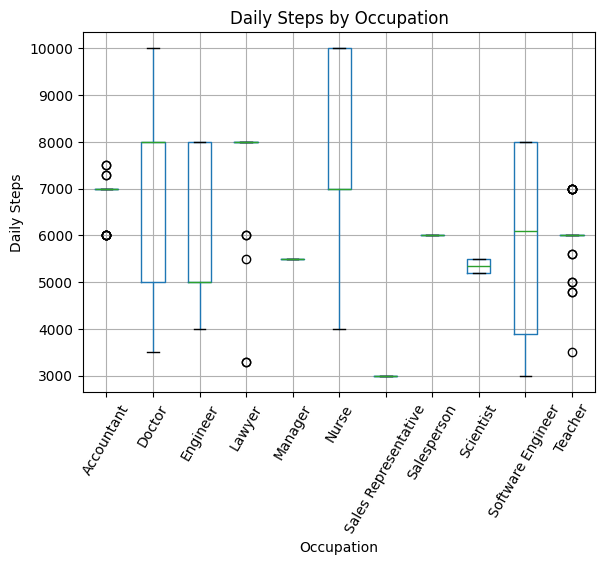

In [63]:
plt.figure(figsize=(12, 8))  # Define o tamanho da figura do gráfico
dataframe.boxplot(column='Daily Steps', by='Occupation', grid=True)  # Cria um boxplot agrupado pela coluna 'Occupation'
plt.title('Daily Steps by Occupation')  
plt.suptitle('') 
plt.xlabel('Occupation')  # Define o rótulo do eixo x
plt.ylabel('Daily Steps')  # Define o rótulo do eixo y
plt.xticks(rotation=60)  # Rotaciona os rótulos do eixo x para melhorar a legibilidade, se for difícil de entender é interessante testar com 0
plt.show()  # Exibe o gráfico


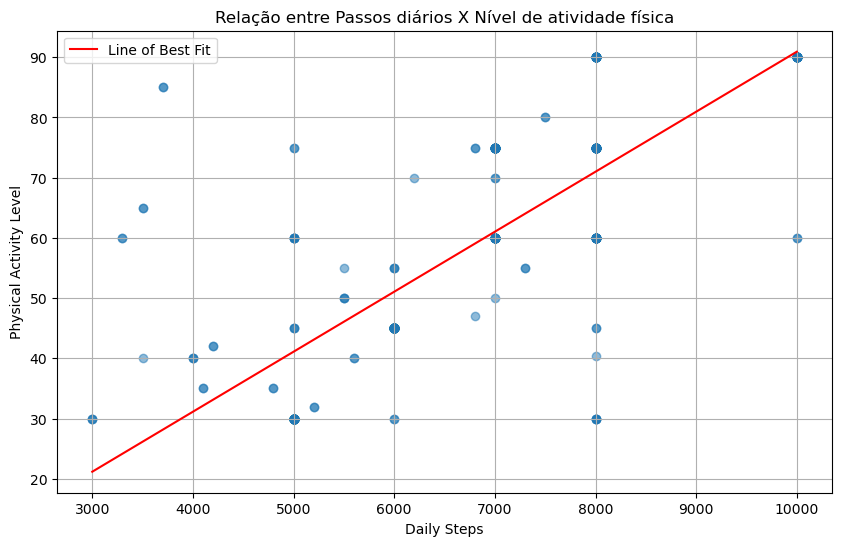

In [14]:

plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(dataframe['Daily Steps'], dataframe['Physical Activity Level'], alpha=0.5)  # Plota os pontos de dispersão com transparência

# Calcula os coeficientes para a linha 
slope, intercept = np.polyfit(dataframe['Daily Steps'], dataframe['Physical Activity Level'], 1)  # Calcula a inclinação e o intercept da linha

# Cria valores de x para a linha a partir dos dados de dispersão
x = np.array([dataframe['Daily Steps'].min(), dataframe['Daily Steps'].max()])  # Define o intervalo de x baseado no mínimo e máximo

# Calcula os valores correspondentes de y a partir da inclinação e intercepto
y = slope * x + intercept  # Calcula y usando a equação da linha

# Plota a linha de melhor ajuste
plt.plot(x, y, 'r', label='Line of Best Fit')  # Plota a linha de melhor ajuste em vermelho e adiciona uma legenda

# Adiciona rótulos, título, grade e legenda ao gráfico
plt.xlabel('Daily Steps')  # Rótulo do eixo x
plt.ylabel('Physical Activity Level')  # Rótulo do eixo y
plt.title('Relação entre Passos diários X Nível de atividade física')  # Título do gráfico
plt.grid(True)  # Ativa a grade no gráfico para melhor visualização
plt.legend()  # Mostra a legenda do gráfico

# Mostra o gráfico
plt.show()  # Exibe o gráfico final


É interessante analisar esses gráfico, pois mostra que, em geral, enfermeiros possuem uma quantidade alta de passos diários, enquanto engenheiros, engeheiros de software e representantes de vendas podem ter uma quantidade baixa de passos diários. Isso possivelmente revela um público alvo para o qual podemos direcionar ações/produtos que motivem mais passos diários (ou atividade física, uma vez que essas 2 features estão relacionadas).

```python
# Outro pequeno plot relacionado ao de cima, apenas para confirmar as tendências vistas 

/tmp/ipykernel_11537/2010749997.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe['Daily Steps'].groupby(dataframe['Occupation']).median().plot.bar()


<Axes: xlabel='Occupation'>

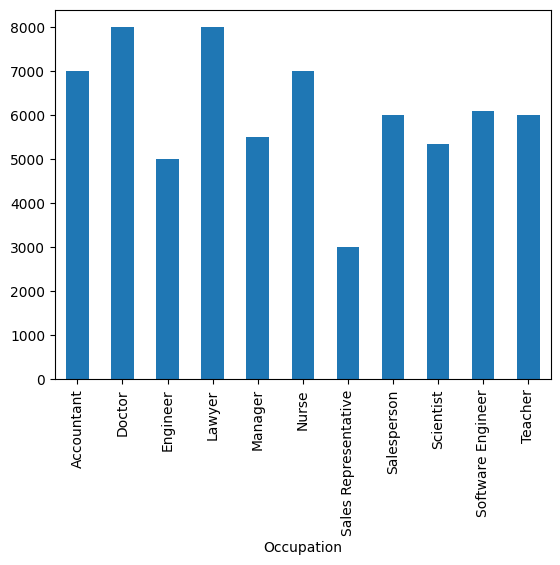

In [46]:
dataframe['Daily Steps'].groupby(dataframe['Occupation']).median().plot.bar()

### Níveis de estresse por `Occupation`

```python
# Estudo sobre como cada profissão pode acarretar níveis de estresse diferentes

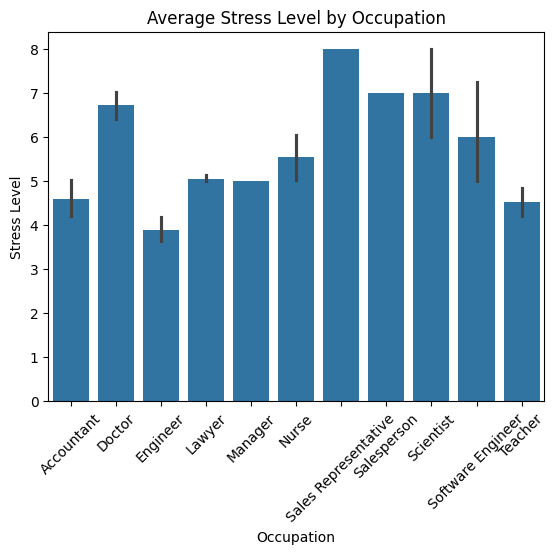

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Occupation', y='Stress Level', data=dataframe)
plt.xticks(rotation=45)
plt.title('Estresse por profissão')
plt.show()


Observamos altos níveis de estresse em profissões como representante de vendas, cientista, doutor e engenheiro de software, mais uma vez revelando um possível público alvo para produtos direcionados a tratamento de estresse.

### Problemas com `sono` X `BMI`

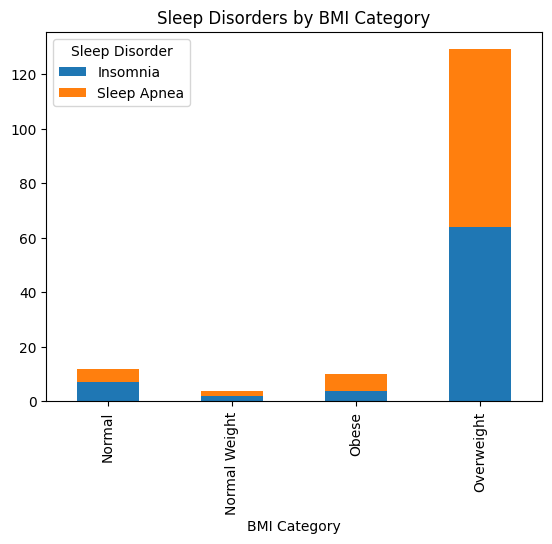

In [48]:

pd.crosstab(dataframe['BMI Category'], dataframe['Sleep Disorder']).plot(kind='bar', stacked=True)
plt.title('Sleep Disorders por BMI Category')
plt.show()



Como apenas o gráfico acima possa ser inconclusivo, observe que basicamente todos os indivíduos obesos possuem algum problema com sono, tendência também presente para aqueles acima do peso. Em contrapartida, apenas uma pequena fração das pessoas com BMI normal possuem enfermidades.

In [49]:
dataframe['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

### Gráfico `BPMs` X `BMI` X `Atividade Física`
```python
# Analisamos a relação que sabemos existir entre as 3 variáveis
```

### Gráfico `Pressão sanguínea`

```python
# Ainda abaixo vemos a relação entre atividade física e a pressão sanguínea

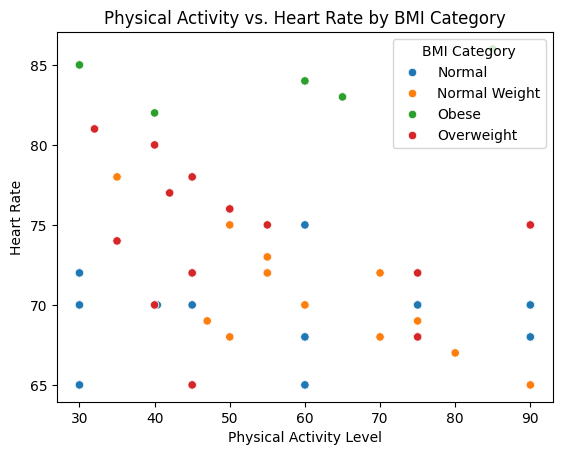

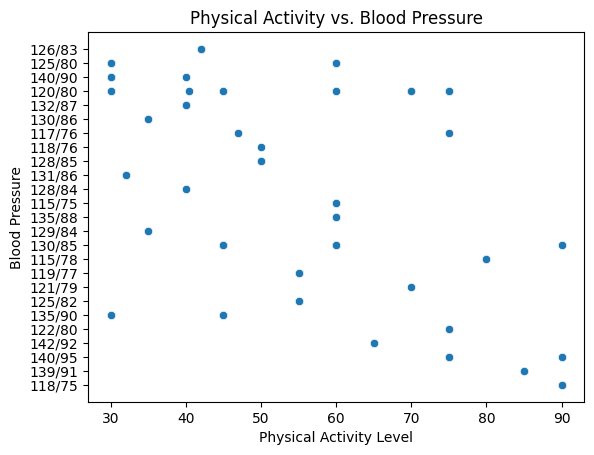

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Physical Activity Level', y='Heart Rate', data=dataframe, hue='BMI Category')
plt.title('Physical Activity vs. Heart Rate by BMI Category')
plt.show()


sns.scatterplot(x='Physical Activity Level', y='Blood Pressure', data=dataframe)
plt.title('Physical Activity vs. Blood Pressure')
plt.show()


No 2o gráfico, podemos ver que há uma relação entre pressão sanguínea e nível de atividade física: pessoas que praticam mais exercícios físicos tendem a possuir uma pressão sanguínea maior. Isso ocorre possivelmente por conta do melhor fluxo sanguíneo e da dilatação dos vasos sanguíneos, consequências da prática de exercícios, importantes benefícios que ajudam a previnir doenças como aterosclerose, que é o acumulo de lipídios e colesterol nas paredes das artérias.

Já no primeiro, observamos que pessoas que praticam mais exercícios tendem a ter tanto uma taxa de batimentos cardíacos menor, quanto um índice de massa corporal menor. Também podemos ver uma certa relação entre índices de massa corporal maiores e taxa de batimentos cardíacos maior.

### Gráfico de comparação entre `Gender`

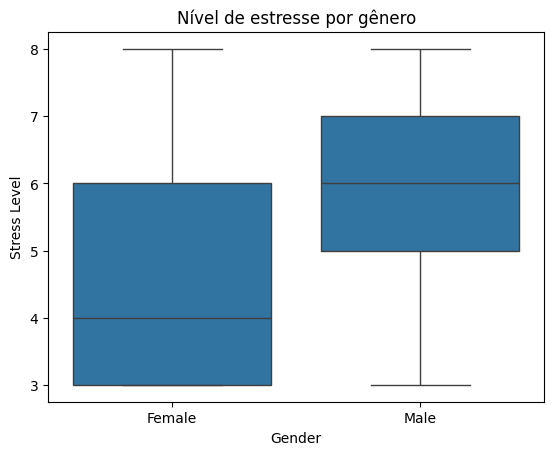

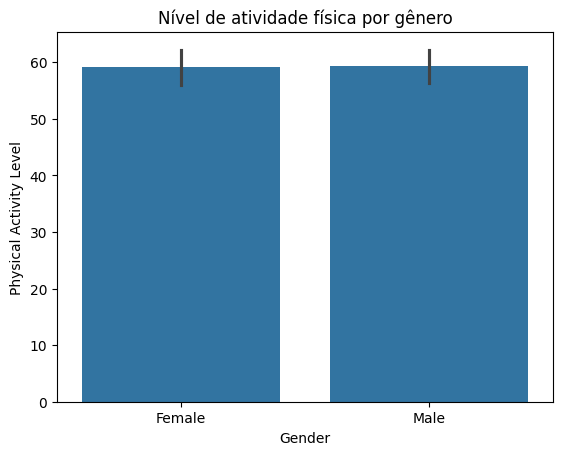

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender vs. Stress Level
sns.boxplot(x='Gender', y='Stress Level', data=dataframe)
plt.title('Nível de estresse por gênero')
plt.show()

# Gender vs. Physical Activity Level
sns.barplot(x='Gender', y='Physical Activity Level', data=dataframe)
plt.title('Nível de atividade física por gênero')
plt.show()

Observamos uma tendência a homens ter níveis de estresse maiores que mulheres, também revelando um possível público alvo. Observamos um nível equivalente de atividade física entre homens e mulheres.

### Gráfico `Stress` X `Quality of Sleep`
```python
# Analisamos o nível de estresse decorrente da qualidade do sono

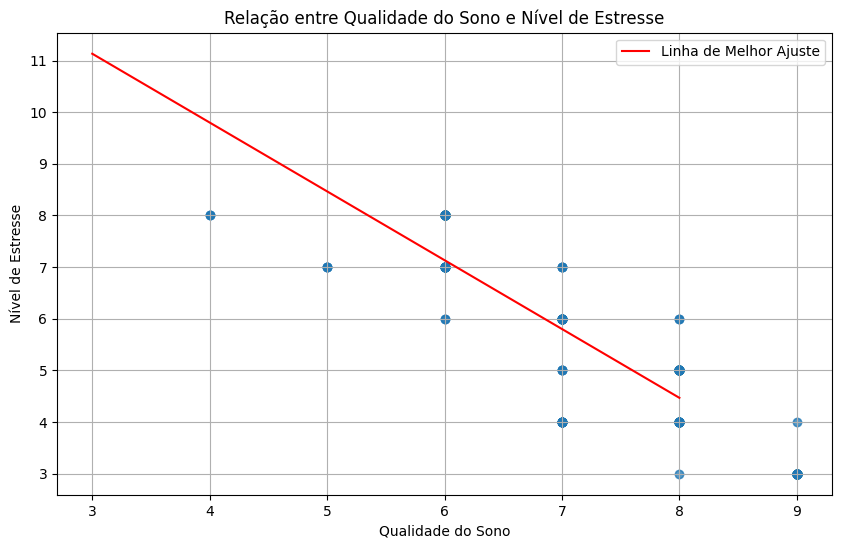

In [73]:

plt.figure(figsize=(10, 6))
plt.scatter(dataframe['Quality of Sleep'], dataframe['Stress Level'], alpha=0.5)

# Calcula os coeficientes para a linha
slope, intercept = np.polyfit(dataframe['Quality of Sleep'], dataframe['Stress Level'], 1)

x = np.array([dataframe['Stress Level'].min(), dataframe['Stress Level'].max()])

y = slope * x + intercept

plt.plot(x, y, 'r', label='Linha de Melhor Ajuste')

plt.xlabel('Qualidade do Sono')
plt.ylabel('Nível de Estresse')
plt.title('Relação entre Qualidade do Sono e Nível de Estresse')
plt.grid(True)
plt.legend()

plt.show()


Aqui podemos ver a importância da qualidade de sono em relação ao nível de estresse, maior qualidade de sono (ou seja, mais horas de sono) leva a níveis de estresse menores. Assim, temos mais um argumento que mostra a importância de uma boa noite de sono.

## `Teste de hipótese`

#### Hipótese nula (H0): Não há relação monotônica entre o nível de atividade física e a qualidade do sono.

#### Hipótese alternativa (H1): Existe uma relação monotônica (seja crescente ou decrescente) entre o nível de atividade física e a qualidade do sono.


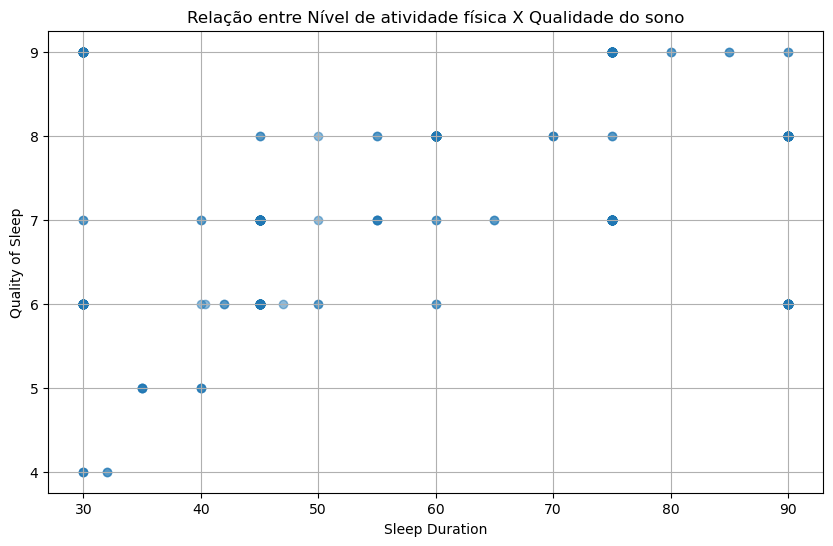

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(dataframe['Physical Activity Level'], dataframe['Quality of Sleep'], alpha=0.5)
plt.title('Relação entre Nível de atividade física X Qualidade do sono')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.grid(True)
plt.show()

Primeiramente, precisamos analisar se os dados seguem uma distribuição gaussiana.

Text(0.5, 1.0, 'Histogram of Quality of Sleep')

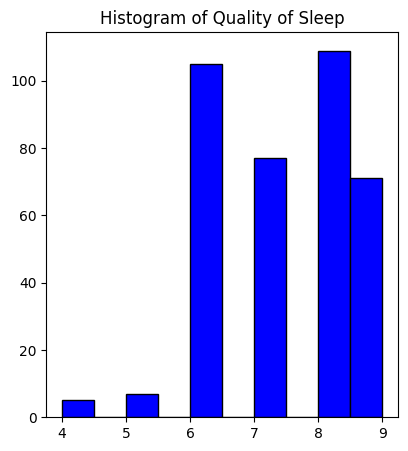

In [53]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(dataframe['Quality of Sleep'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Quality of Sleep')

Não seguem uma distribuição gaussiana, então utilizaremos o algoritmo de spearmanr, com uma taxa de significância de 5%, para o nosso teste de hipótese.

In [33]:
import scipy.stats

In [67]:
corr, p_value = spearmanr(dataframe['Physical Activity Level'], dataframe['Quality of Sleep'])
print("Spearman's Correlation Coefficient:", corr)

print("P-value:", p_value)

Spearman's Correlation Coefficient: 0.17755453746137317
P-value: 0.0005612178768952386


Observamos que o p-value é de 0.05%, com uma taxa de significância de 5% (0.05), assim temos que a hipótese nula é rejeitada. Assim, há uma relação monotônica entre o nível de atividade física e a qualidade do sono.

## `2o` teste de hipótese

Hipótese nula(H0): Não tem diferença significativa no nível de estresse entre doutores e engenheiros de software.

Hipótese alternativa(H1): Tem diferença significativa no nível de estresse entre doutores e engenheiros.

Taxa de significância: 5%

<Axes: xlabel='Occupation'>

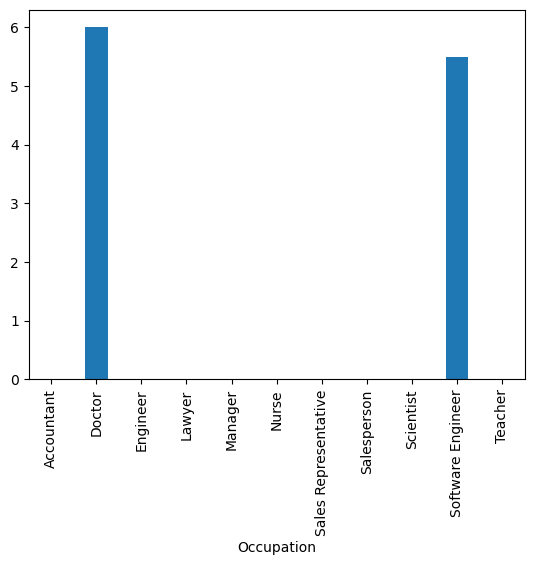

In [29]:
# Filtrando as ocupações
filtered_df = dataframe[(dataframe['Occupation'] == 'Doctor') | (dataframe['Occupation'] == 'Software Engineer')]

# calculando a mediana
grouped_df = filtered_df.groupby('Occupation')['Stress Level'].median()

grouped_df.plot.bar()

Checando se os dados seguem uma distribuição gaussiana:

<Axes: ylabel='Frequency'>

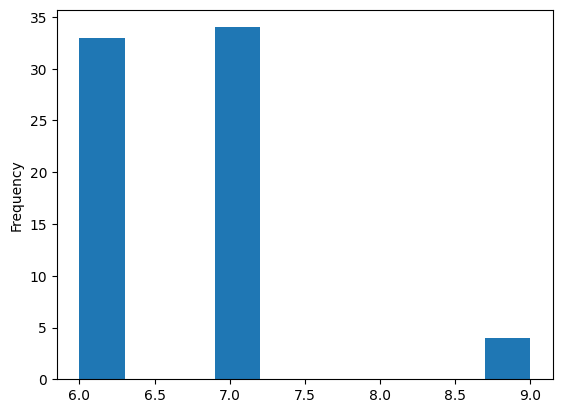

In [69]:
dataframe[dataframe['Occupation'] == 'Doctor']['Quality of Sleep'].plot.hist()

Não seguem, dessa forma, utilizaremos o algoritmo de mannwhitneyu para fazer o teste de hipótese.

In [36]:
scipy.stats.mannwhitneyu(dataframe[dataframe['Occupation'] == 'Doctor']['Quality of Sleep'], dataframe[dataframe['Occupation'] == 'Software Engineer']['Quality of Sleep'])

MannwhitneyuResult(statistic=133.5, pvalue=0.8343536156201135)

Observamos que o p-value é de 83%, com uma taxa de significância de 5% (0.05), assim temos que a hipótese nula não é rejeitada, ou seja, não há uma diferência significativa entre o nível de estresse em engenheiros de software e doutores.